# Modules

In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

# Run OOG with seperate ref sequences

In [2]:
data_src = r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\first_8000.tif"

Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\first_8000.tif
Getting reference sequence
Reference period: 61.82419102610369; Reference indices: [18, 86]
Getting SADs
Getting phases
Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\first_8000.tif
Getting SADs
Getting phases


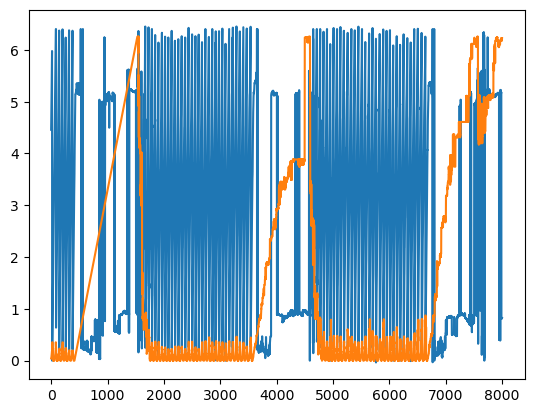

In [3]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.run()

oog_arr = OG.BasicOpticalGating()
oog_arr.sequence_manager.set_source(data_src)
oog_arr.sequence_manager.set_reference_sequence_by_indices([412, 1533])
oog_arr.run()

plt.plot(oog.phases)
plt.plot(oog_arr.phases)

Text(0, 0.5, 'Phase')

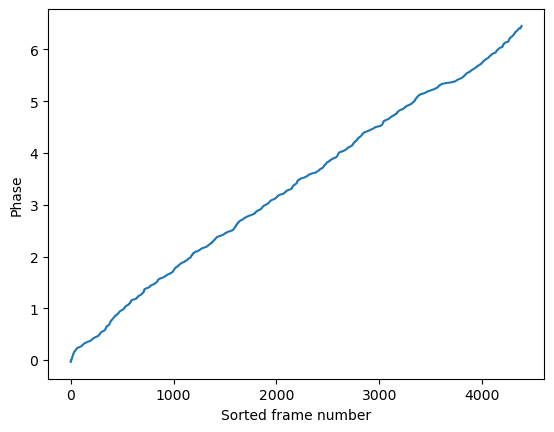

In [25]:
healthy_phase_locations = np.where(oog_arr.phases < 0.5)
sorted = np.argsort(oog.phases[healthy_phase_locations])
plt.plot(oog.phases[healthy_phase_locations][sorted])
plt.xlabel("Sorted frame number")
plt.ylabel("Phase")

Text(0, 0.5, 'Phase')

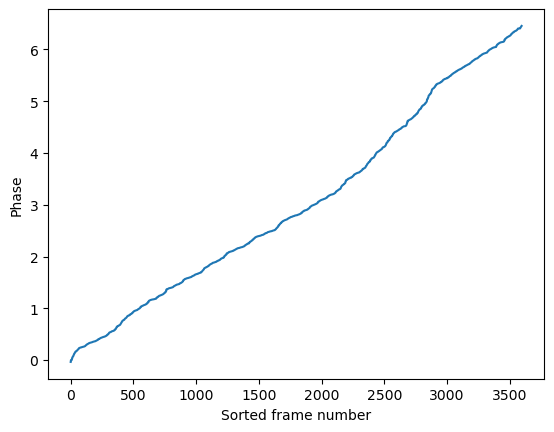

In [21]:
oog_sad_mins = np.min(oog.sads,axis = 1)
oog_arr_sad_mins = np.min(oog_arr.sads,axis = 1)

healthy_phase_locations = np.where(oog_sad_mins < oog_arr_sad_mins)
sorted = np.argsort(oog.phases[healthy_phase_locations])
plt.plot(oog.phases[healthy_phase_locations][sorted])
plt.xlabel("Sorted frame number")
plt.ylabel("Phase")

Text(0, 0.5, 'Phase')

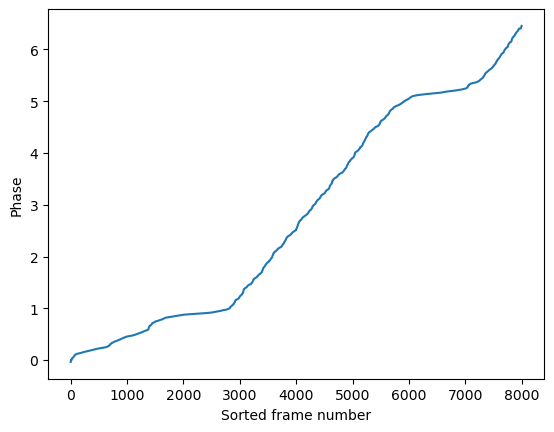

In [22]:
sorted = np.argsort(oog.phases)
plt.plot(oog.phases[sorted])
plt.xlabel("Sorted frame number")
plt.ylabel("Phase")

In [4]:
diffs = []
for i in range(oog.sequence_manager.reference_sequence.shape[0]):
    diffs.append(jps.sad_with_references(oog.sequence_manager.reference_sequence[i], oog_arr.sequence_manager.reference_sequence[200::]))

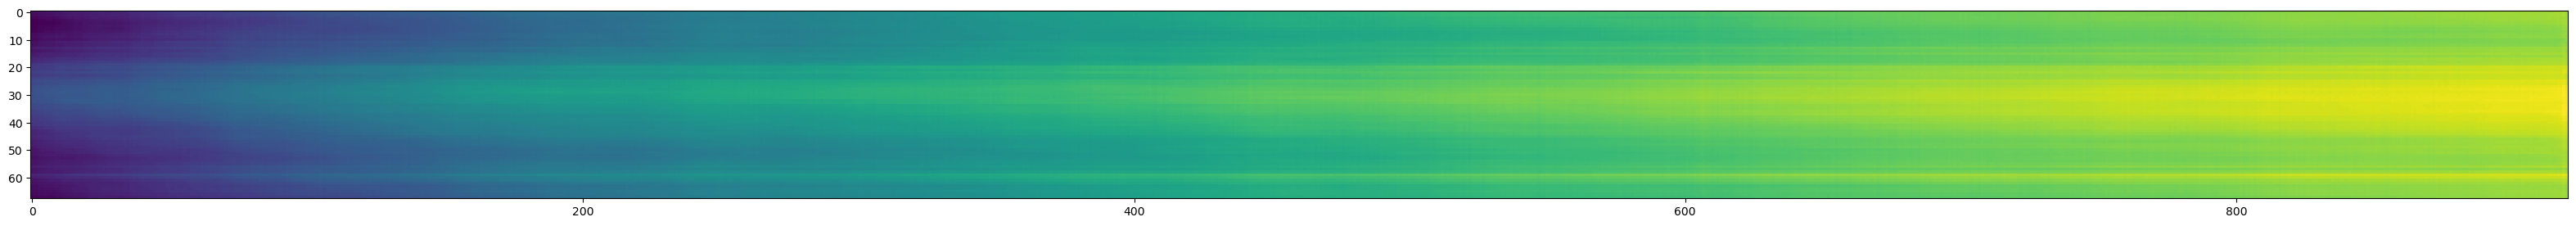

In [5]:
plt.figure(figsize = (40,9))
plt.imshow(diffs, interpolation= "none")
plt.show()